# Federal University of Campina Grande (UFCG)
# Author: Rayana Souza Rocha
# Available at: https://github.com/rayanarocha/machinelearning/tree/590e295d554c0fffdcf11093abd7dbac74e5ce91/previs%C3%A3o-de-vota%C3%A7%C3%A3o-de-deputados

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

C:\Users\rayan\AppData\Local\Temp\ipykernel_20260\2916246244.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [35]:
all_data = pd.read_csv("../previsão-de-votação-de-deputados/eleicoes_2014.csv")

In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ano                                    4936 non-null   int64  
 1   sq_candidato                           4936 non-null   int64  
 2   nome_candidato                         4936 non-null   object 
 3   sigla_uf                               4936 non-null   object 
 4   sigla_partido                          4936 non-null   object 
 5   qtd_doacoes                            4936 non-null   int64  
 6   qtd_doadores                           4936 non-null   int64  
 7   total_receita                          4936 non-null   float64
 8   media_receita                          4936 non-null   float64
 9   recursos de outros candidatos/comitês  3191 non-null   float64
 10  recursos de pessoas físicas            3727 non-null   float64
 11  recu

In [37]:
all_data.describe(include=['object'])

,nome_candidato,sigla_uf,sigla_partido,descricao_cargo,sexo,grau_instrucao,estado_civil,descricao_ocupacao
count,4936,4936,4936,4936,4936,4936,4936,4936
unique,4929,27,32,1,2,7,5,159
top,ANTONIO FERREIRA PINTO,SP,PSB,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),OUTROS
freq,2,1084,325,4936,3607,2707,2841,651


In [38]:
all_data.votos.isnull().sum()

0

In [39]:
msk = np.random.rand(len(all_data)) < 0.8 # cria uma mascara com as posicoes
train = all_data[msk]
test = all_data[~msk]

In [40]:
train.head(5)

,ano,sq_candidato,nome_candidato,sigla_uf,sigla_partido,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,...,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,descricao_cargo,sexo,grau_instrucao,estado_civil,descricao_ocupacao,votos
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.00,526.666667,NaN,...,3,3,1580.00,526.666667,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",37
2,2014,10000000158,CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,40,38,333293.13,8770.871842,1923.07,...,145,139,326869.78,2351.581151,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS,26448
3,2014,10000000161,IDESIO LUIS FRANKE,AC,PT,29,29,156719.32,5404.114483,39122.32,...,136,121,241016.07,1991.868347,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),AGRÔNOMO,9896
4,2014,10000000163,LEONARDO CUNHA DE BRITO,AC,PT,160,146,711083.00,4870.431507,10000.00,...,518,354,567401.15,1602.828107,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,20876
5,2014,10000000164,MARCELO FEITOSA DE ARAÚJO,AC,PT,4,3,23000.00,7666.666667,20000.00,...,12,12,29950.00,2495.833333,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BOMBEIRO MILITAR,1025


In [41]:
test.head(5)

,ano,sq_candidato,nome_candidato,sigla_uf,sigla_partido,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,...,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,descricao_cargo,sexo,grau_instrucao,estado_civil,descricao_ocupacao,votos
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.00,636.000000,NaN,...,6,5,3130.02,626.004000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE,383
7,2014,10000000168,RAMAO VIEIRA DE OLIVEIRA,AC,PROS,3,3,150000.00,50000.000000,150000.00,...,56,53,148903.95,2809.508491,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),EMPRESÁRIO,1994
8,2014,10000000169,REGINA AMELIA D ALENCAR LINO,AC,PTB,15,13,460300.00,35407.692308,100000.00,...,177,170,554900.36,3264.119765,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),ASSISTENTE SOCIAL,3842
15,2014,10000000178,JOSÉ LUIS SCHAFER,AC,PDT,24,23,382403.65,16626.245652,207153.65,...,223,152,327600.91,2155.269145,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),DEPUTADO,11397
17,2014,10000000180,JOSE AFONSO VASCONCELOS FERNADES,AC,PSDC,2,2,53846.15,26923.075000,3846.15,...,19,18,49712.71,2761.817222,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),EMPRESÁRIO,3343


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 0 to 4935
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ano                                    3965 non-null   int64  
 1   sq_candidato                           3965 non-null   int64  
 2   nome_candidato                         3965 non-null   object 
 3   sigla_uf                               3965 non-null   object 
 4   sigla_partido                          3965 non-null   object 
 5   qtd_doacoes                            3965 non-null   int64  
 6   qtd_doadores                           3965 non-null   int64  
 7   total_receita                          3965 non-null   float64
 8   media_receita                          3965 non-null   float64
 9   recursos de outros candidatos/comitês  2553 non-null   float64
 10  recursos de pessoas físicas            2999 non-null   float64
 11  recu

Determinando números máximos de cada coluna

In [43]:
train.max()

ano                                                                     2014
sq_candidato                                                    270000000335
nome_candidato                           ÍTALO HENRIQUE CASTELO BRANCO MUNIZ
sigla_uf                                                                  TO
sigla_partido                                                             SD
qtd_doacoes                                                              928
qtd_doadores                                                             873
total_receita                                                      5836139.5
media_receita                                                       281250.0
recursos de outros candidatos/comitês                              1788100.5
recursos de pessoas físicas                                        1613553.0
recursos de pessoas jurídicas                                     3828337.92
recursos próprios                                                  3752000.0

Determinando números mínimos de cada coluna

In [44]:
train.min()

ano                                                             2014
sq_candidato                                             10000000135
nome_candidato                                 ABDIAS BRAZ FERNANDES
sigla_uf                                                          AC
sigla_partido                                                    DEM
qtd_doacoes                                                        1
qtd_doadores                                                       1
total_receita                                                    0.3
media_receita                                                    0.3
recursos de outros candidatos/comitês                           0.15
recursos de pessoas físicas                                     0.01
recursos de pessoas jurídicas                                   1.17
recursos próprios                                                0.2
qtd_despesas                                                       1
qtd_fornecedores                  

Normalizando o modelos

In [45]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()

In [46]:
train[["ano","sq_candidato","qtd_doacoes","qtd_doadores","total_receita","media_receita","recursos de outros candidatos/comitês","recursos de pessoas físicas","recursos de pessoas jurídicas","recursos próprios","qtd_despesas","qtd_fornecedores","total_despesa","media_despesa","votos"]] = normalizador.fit_transform(train[["ano","sq_candidato","qtd_doacoes","qtd_doadores","total_receita","media_receita","recursos de outros candidatos/comitês","recursos de pessoas físicas","recursos de pessoas jurídicas","recursos próprios","qtd_despesas","qtd_fornecedores","total_despesa","media_despesa","votos"]])

C:\Users\rayan\AppData\Local\Temp\ipykernel_20260\3989129068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[["ano","sq_candidato","qtd_doacoes","qtd_doadores","total_receita","media_receita","recursos de outros candidatos/comitês","recursos de pessoas físicas","recursos de pessoas jurídicas","recursos próprios","qtd_despesas","qtd_fornecedores","total_despesa","media_despesa","votos"]] = normalizador.fit_transform(train[["ano","sq_candidato","qtd_doacoes","qtd_doadores","total_receita","media_receita","recursos de outros candidatos/comitês","recursos de pessoas físicas","recursos de pessoas jurídicas","recursos próprios","qtd_despesas","qtd_fornecedores","total_despesa","media_despesa","votos"]])


In [47]:
test[["ano","sq_candidato","qtd_doacoes","qtd_doadores","total_receita","media_receita","recursos de outros candidatos/comitês","recursos de pessoas físicas","recursos de pessoas jurídicas","recursos próprios","qtd_despesas","qtd_fornecedores","total_despesa","media_despesa","votos"]] = normalizador.fit_transform(test[["ano","sq_candidato","qtd_doacoes","qtd_doadores","total_receita","media_receita","recursos de outros candidatos/comitês","recursos de pessoas físicas","recursos de pessoas jurídicas","recursos próprios","qtd_despesas","qtd_fornecedores","total_despesa","media_despesa","votos"]])

C:\Users\rayan\AppData\Local\Temp\ipykernel_20260\1119590471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[["ano","sq_candidato","qtd_doacoes","qtd_doadores","total_receita","media_receita","recursos de outros candidatos/comitês","recursos de pessoas físicas","recursos de pessoas jurídicas","recursos próprios","qtd_despesas","qtd_fornecedores","total_despesa","media_despesa","votos"]] = normalizador.fit_transform(test[["ano","sq_candidato","qtd_doacoes","qtd_doadores","total_receita","media_receita","recursos de outros candidatos/comitês","recursos de pessoas físicas","recursos de pessoas jurídicas","recursos próprios","qtd_despesas","qtd_fornecedores","total_despesa","media_despesa","votos"]])


In [48]:
train.head(5)

,ano,sq_candidato,nome_candidato,sigla_uf,sigla_partido,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,...,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,descricao_cargo,sexo,grau_instrucao,estado_civil,descricao_ocupacao,votos
0,0.0,-2.185692,EMERSON DA SILVA SANTOS,AC,PSOL,-0.452898,-0.459196,-0.371944,-0.391241,NaN,...,-0.336782,-0.337278,-0.370682,-0.435927,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",-0.374863
2,0.0,-2.185692,CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,0.328897,0.431850,0.241899,0.183160,-0.267082,...,-0.005160,0.065651,0.218258,0.545133,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS,0.173377
3,0.0,-2.185692,IDESIO LUIS FRANKE,AC,PT,0.096471,0.202724,-0.084855,-0.051413,0.039397,...,-0.026178,0.012322,0.062819,0.351755,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),AGRÔNOMO,-0.170210
4,0.0,-2.185692,LEONARDO CUNHA DE BRITO,AC,PT,2.864450,3.181365,0.941008,-0.088596,-0.200538,...,0.865932,0.702634,0.653742,0.142610,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,0.057713
5,0.0,-2.185692,MARCELO FEITOSA DE ARAÚJO,AC,PT,-0.431769,-0.459196,-0.332306,0.106227,-0.118149,...,-0.315763,-0.310613,-0.319318,0.622682,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BOMBEIRO MILITAR,-0.354354


array([[<AxesSubplot:title={'center':'votos'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

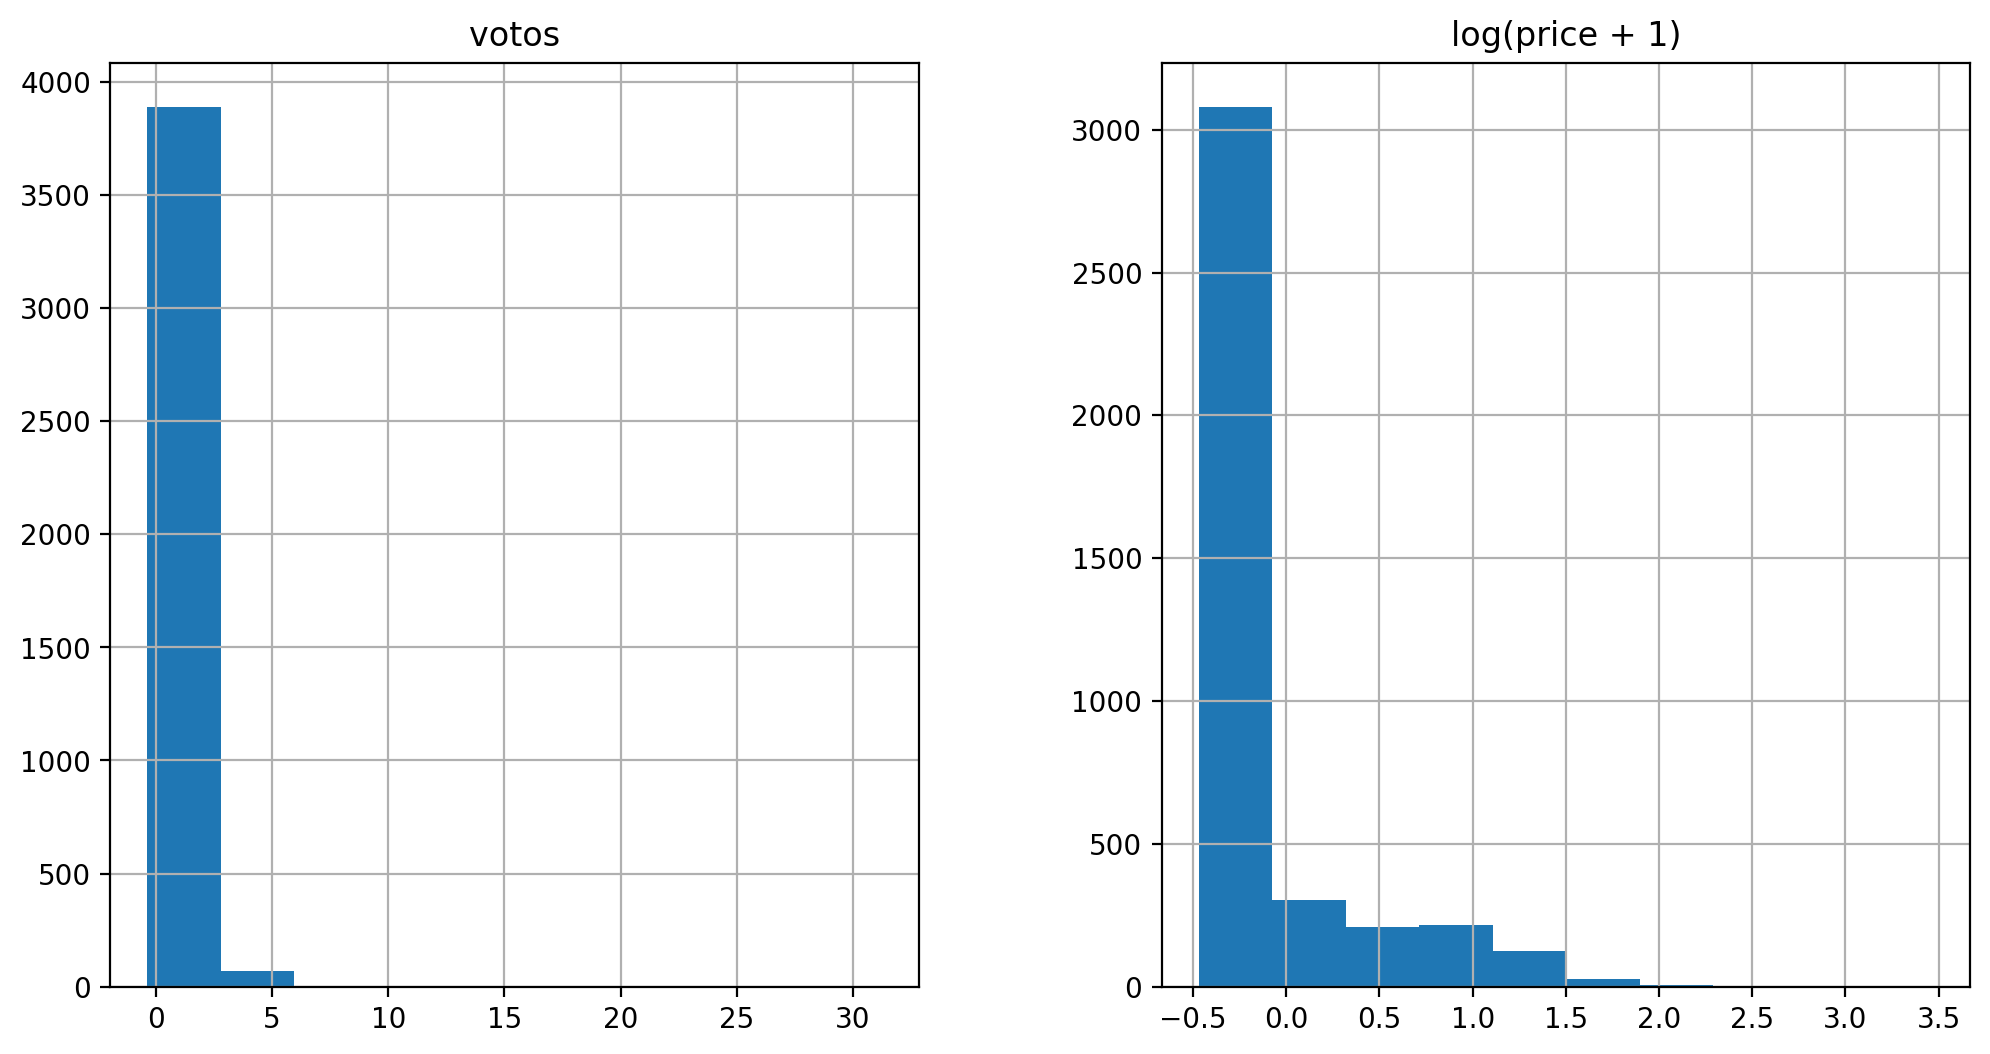

In [49]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
votos = pd.DataFrame({"votos":train["votos"], "log(price + 1)":np.log1p(train["votos"])})
votos.hist()

In [50]:
#log transform the target:
train["votos"] = np.log1p(train["votos"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

C:\Users\rayan\AppData\Local\Temp\ipykernel_20260\3077676299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["votos"] = np.log1p(train["votos"])


In [51]:
all_data = pd.get_dummies(all_data)

In [52]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [53]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.votos

## Models

Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [54]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [55]:
model_ridge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [56]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singul

Text(0, 0.5, 'rmse')

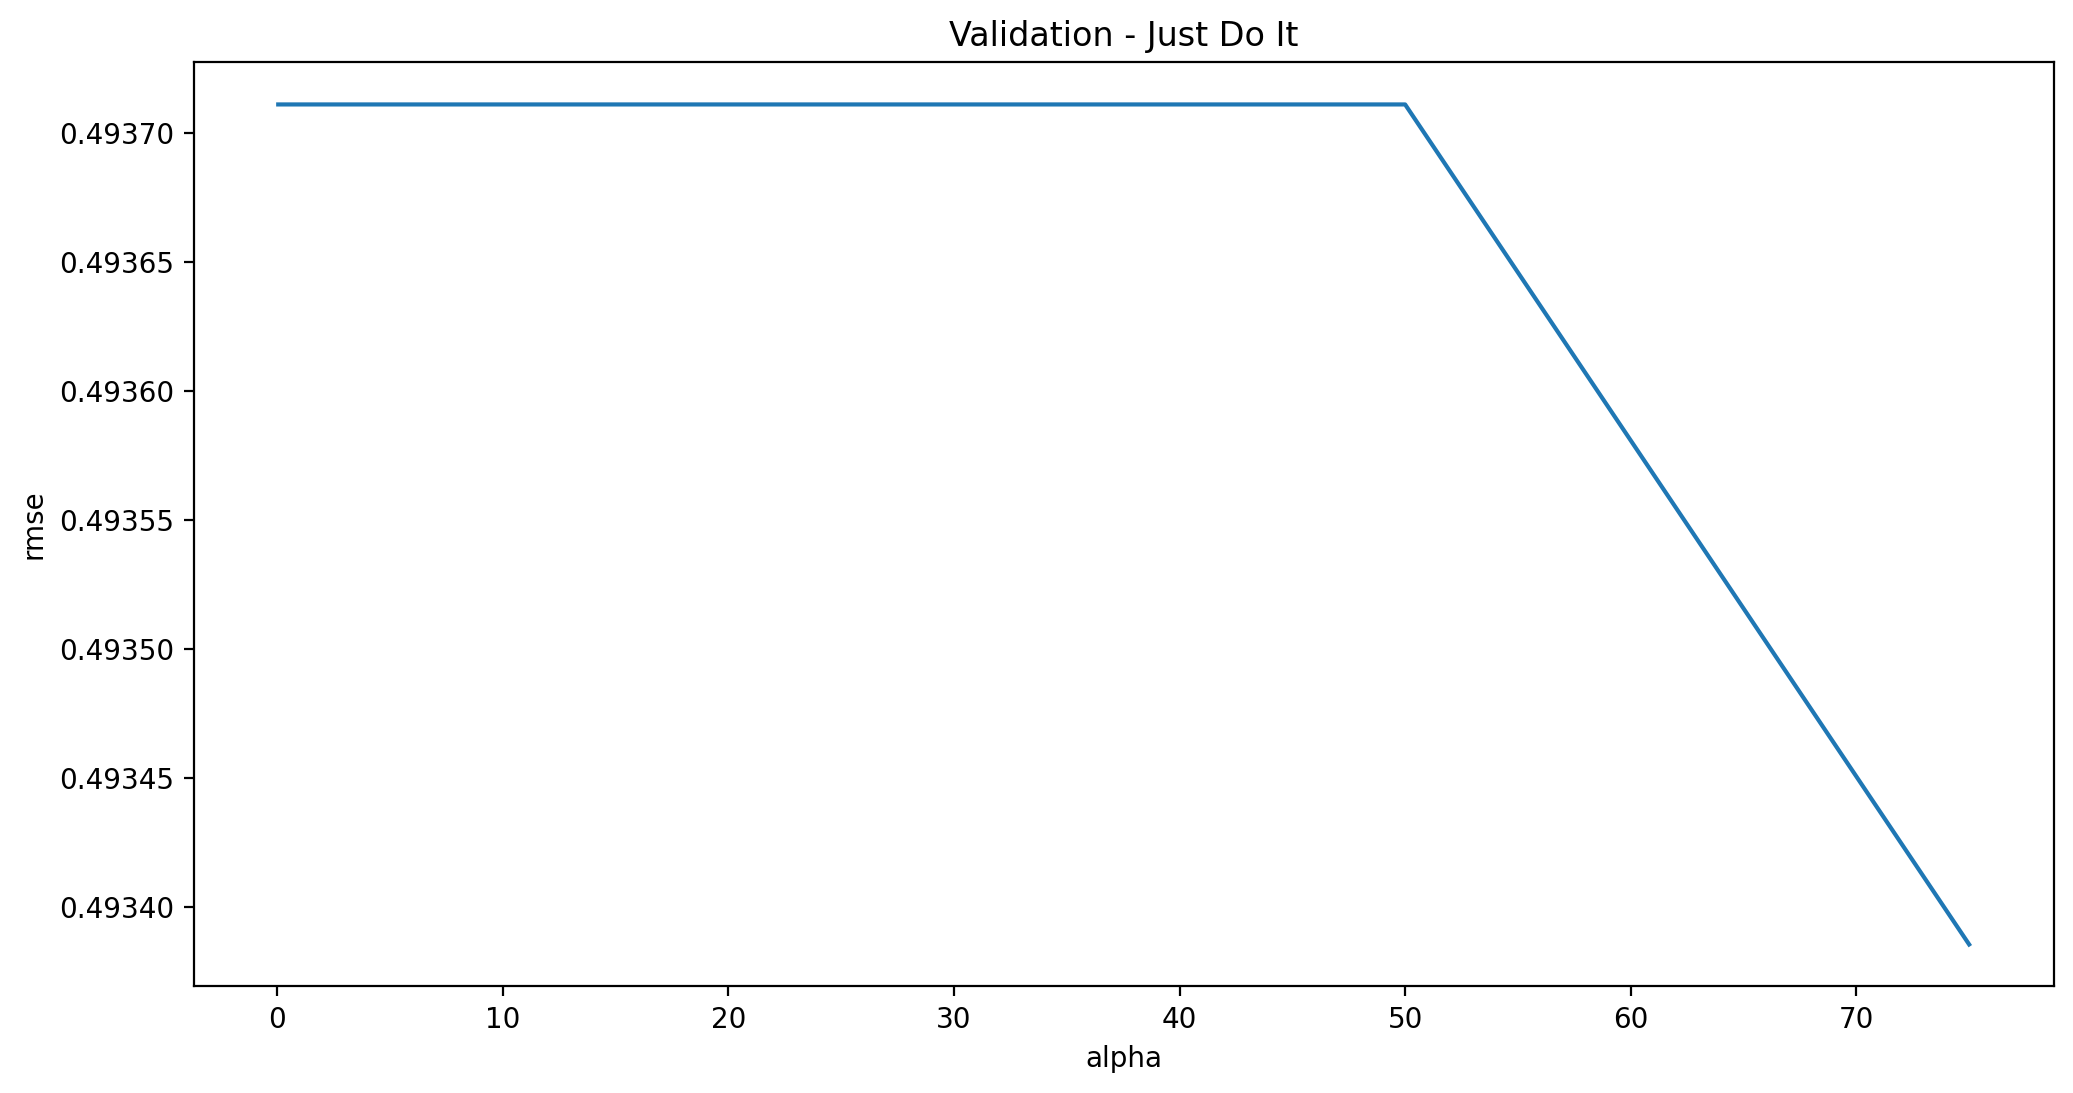

In [57]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.

In [58]:
cv_ridge.min()

0.49338550703035755

So for the Ridge regression we get a rmsle of about 0.127

Let' try out the Lasso model. We will do a slightly different approach here and use the built in Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

In [59]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.536e+02, tolerance: 7.693e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.661e+02, tolerance: 7.645e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [60]:
rmse_cv(model_lasso).mean()

c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.665e+02, tolerance: 5.987e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+02, tolerance: 5.542e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

0.49240225735800874

Nice! The lasso performs even better so we'll just use this one to predict on the test set. Another neat thing about the Lasso is that it does feature selection for you - setting coefficients of features it deems unimportant to zero. Let's take a look at the coefficients:

In [61]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [62]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 5176 variables


Good job Lasso. One thing to note here however is that the features selected are not necessarily the "correct" ones - especially since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.

We can also take a look directly at what the most important coefficients are:

In [63]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

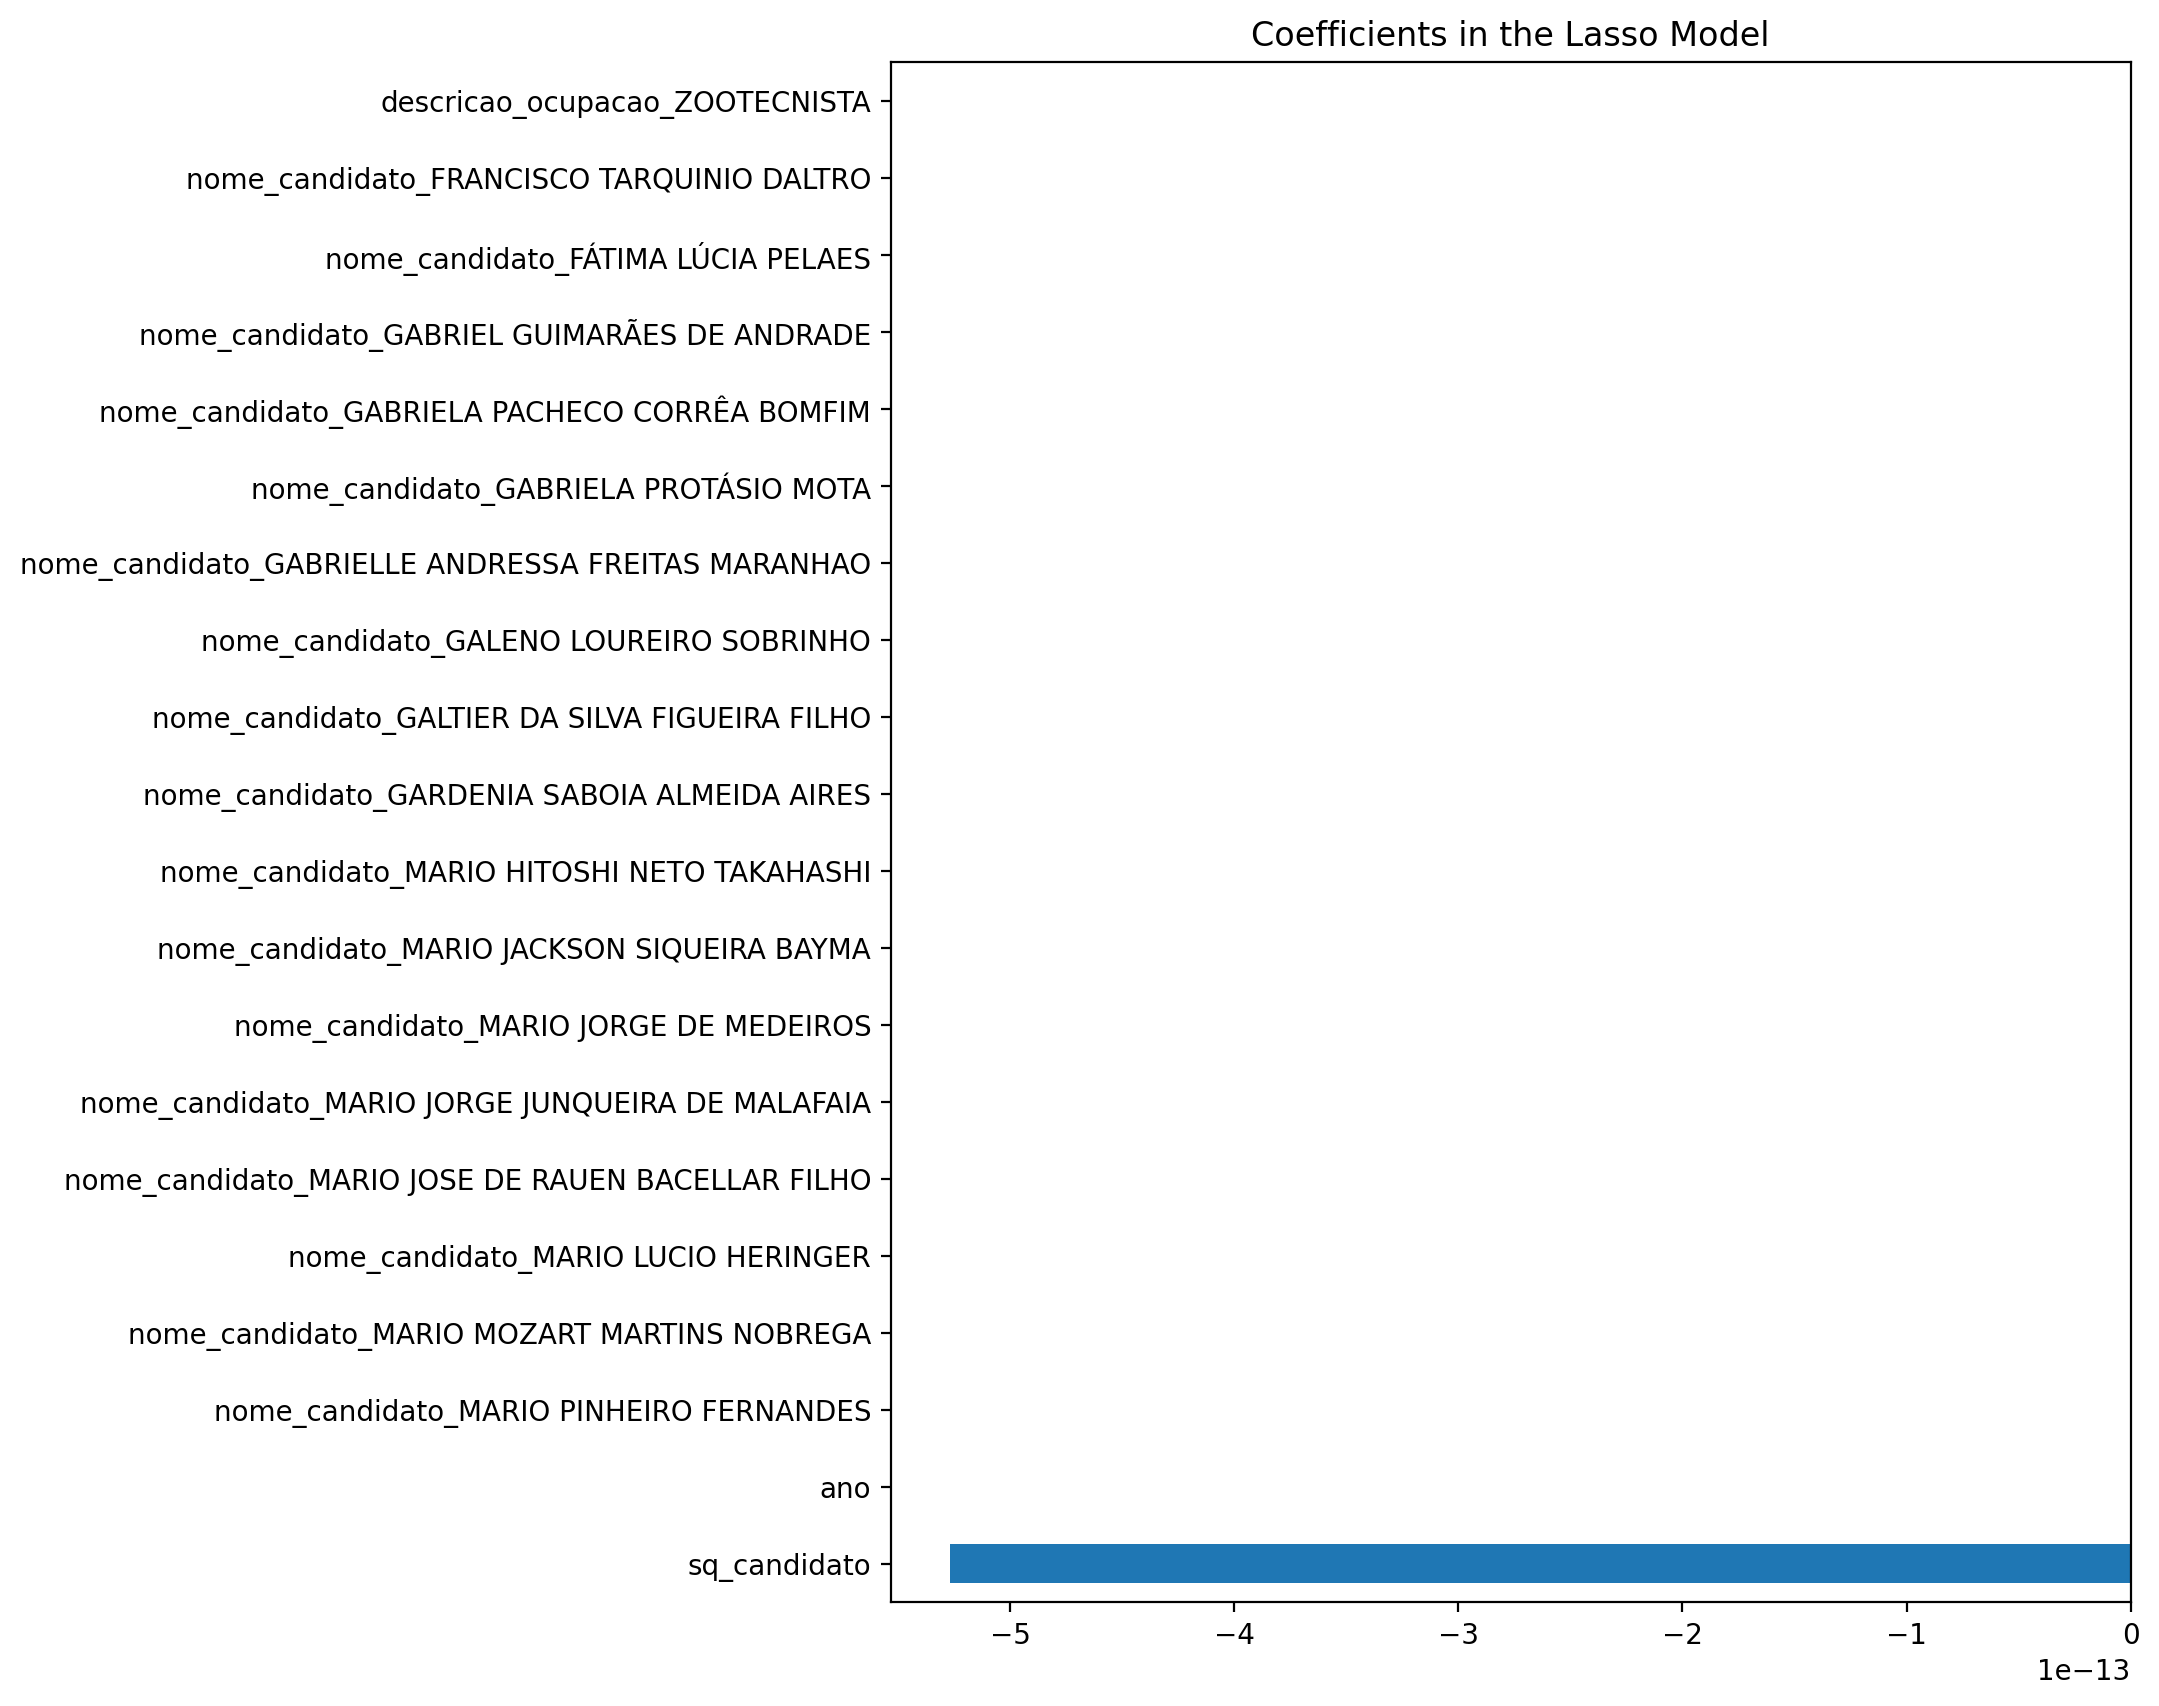

In [64]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

The most important positive feature is GrLivArea - the above ground area by area square feet. This definitely sense. Then a few other location and quality features contributed positively. Some of the negative features make less sense and would be worth looking into more - it seems like they might come from unbalanced categorical variables.

Also note that unlike the feature importance you'd get from a random forest these are actual coefficients in your model - so you can say precisely why the predicted price is what it is. The only issue here is that we log_transformed both the target and the numeric features so the actual magnitudes are a bit hard to interpret.

<AxesSubplot:xlabel='preds', ylabel='residuals'>

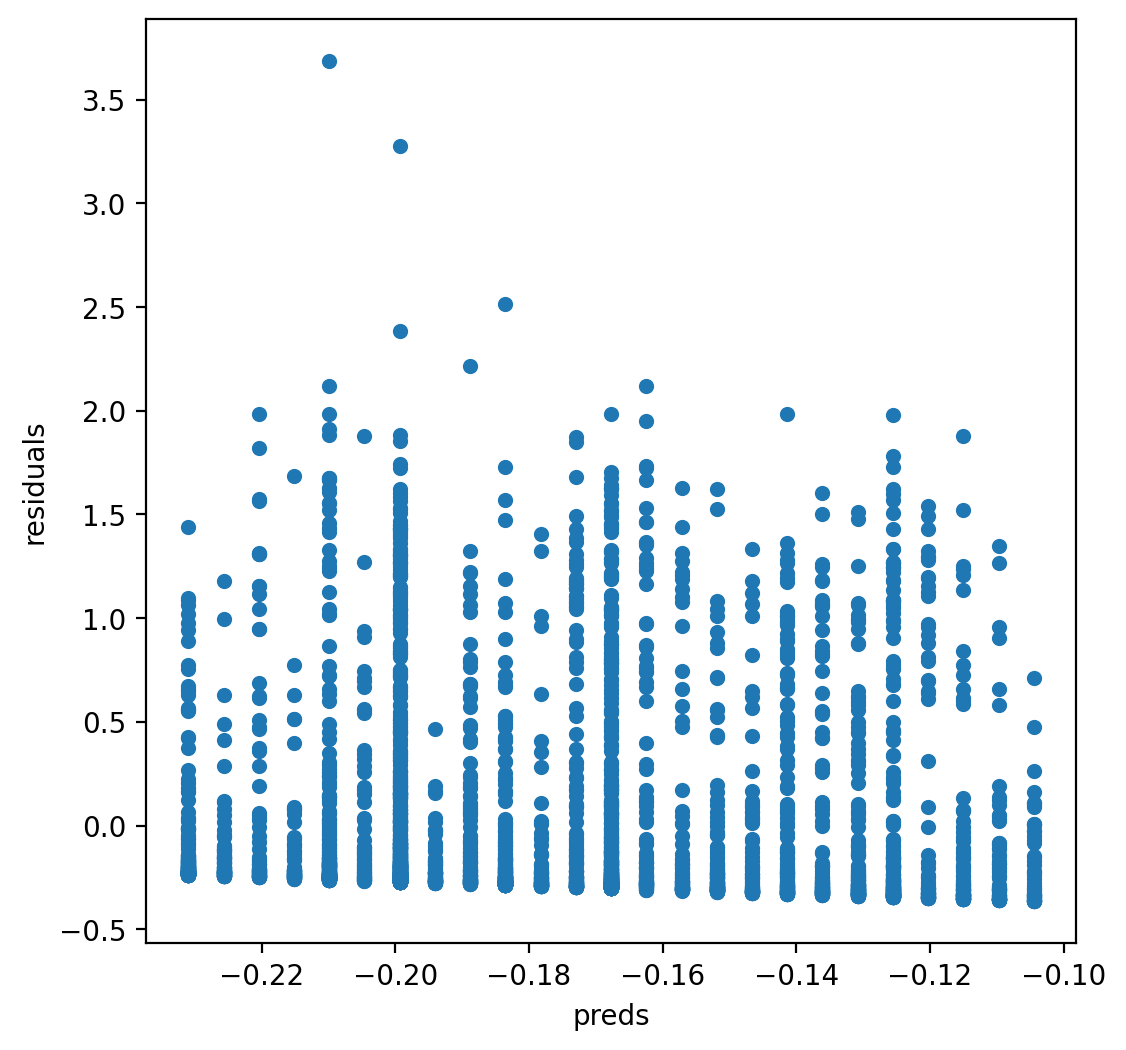

In [65]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

The residual plot looks pretty good.To wrap it up let's predict on the test set and submit on the leaderboard:

## Adding an xgboost model:

Let's add an xgboost model to our linear model to see if we can improve our score:

In [66]:
import xgboost as xgb

In [67]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

<AxesSubplot:>

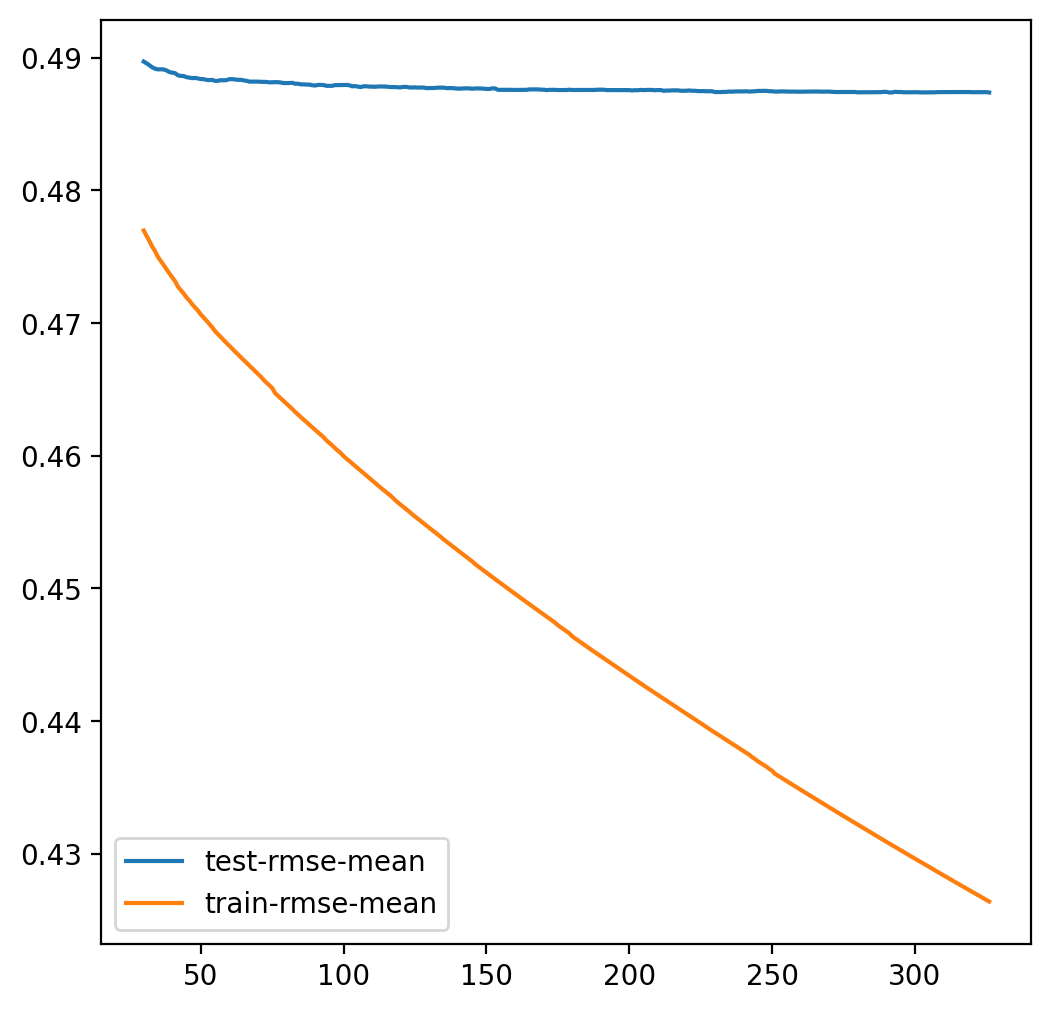

In [68]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [69]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=360, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [70]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

<AxesSubplot:xlabel='xgb', ylabel='lasso'>

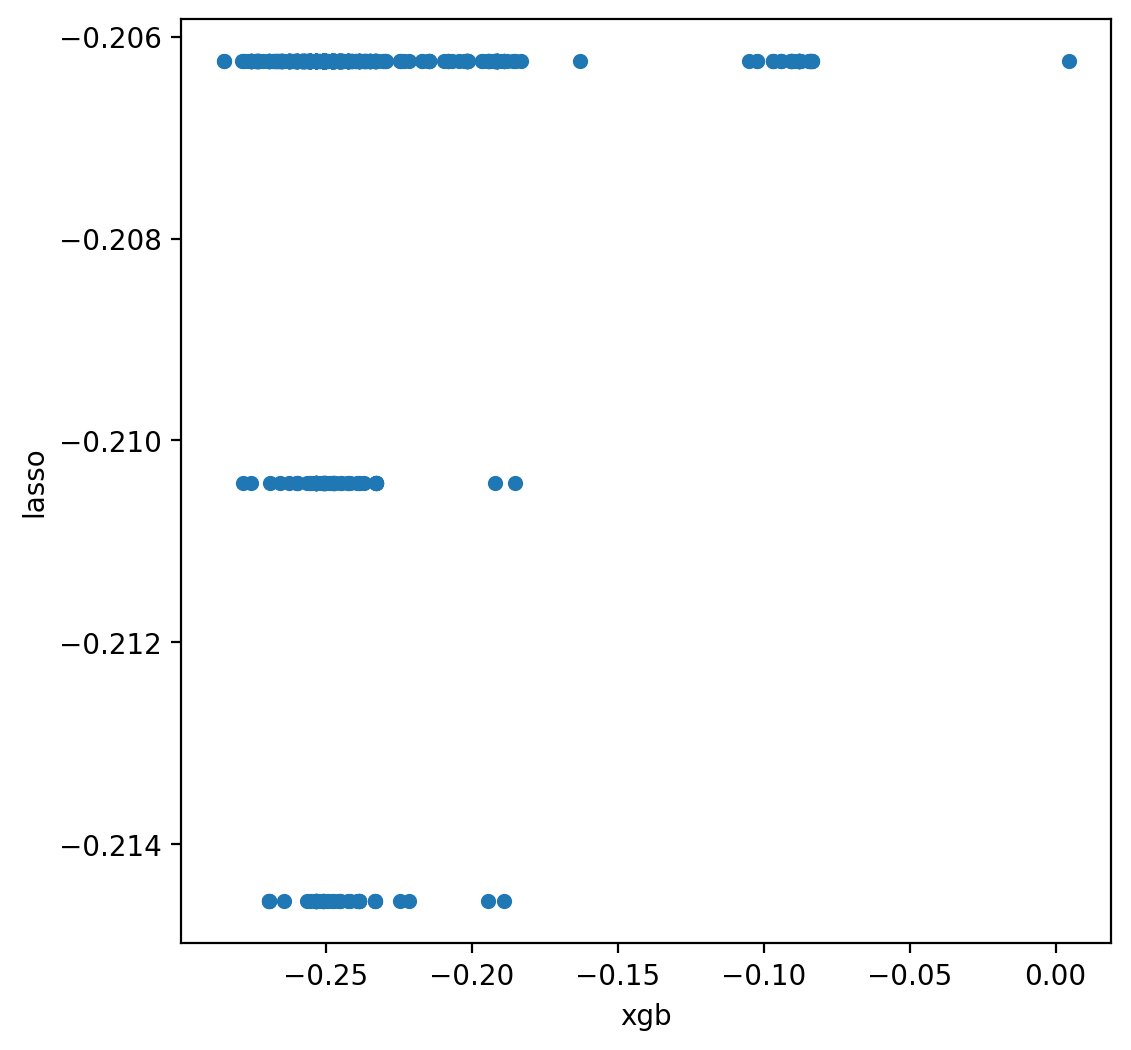

In [71]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

Many times it makes sense to take a weighted average of uncorrelated results - this usually imporoves the score although in this case it doesn't help that much.

In [72]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [73]:
solution = pd.DataFrame({"id":test.ano, "votos":preds})
solution.to_csv("ridge_sol.csv", index = False)

## Trying out keras?

Feedforward Neural Nets doesn't seem to work well at all...I wonder why.

In [74]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [75]:
X_train = StandardScaler().fit_transform(X_train)

In [76]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

In [77]:
X_tr.shape

(2973, 5177)

## KNN

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions

In [79]:
all_data['votos'] = pd.to_numeric(all_data['votos'])
dummies = pd.get_dummies(all_data)
x = np.array(dummies.drop(['votos'], 1))
y = np.array(dummies['votos'])

C:\Users\rayan\AppData\Local\Temp\ipykernel_20260\3647043356.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(dummies.drop(['votos'], 1))


In [80]:
from sklearn import model_selection

x_train_knn, x_test_knn, y_train_knn, y_test_knn = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [81]:
normalizacao_knn = StandardScaler()
x_train_knn = normalizacao_knn.fit_transform(x_train_knn)
x_test_knn = normalizacao_knn.fit_transform(x_test_knn)

In [82]:
from sklearn import neighbors

model_clf = neighbors.KNeighborsRegressor(n_neighbors=80, metric='euclidean')

In [83]:
model_clf.fit(x_train_knn, y_train_knn)

KNeighborsRegressor(metric='euclidean', n_neighbors=80)

In [84]:
accuracy = model_clf.score(x_test_knn, y_test_knn)
accuracy

0.4531111055235064

In [91]:
def knn_comparison(all_data, k):
    x = all_data[['sq_candidato','votos']].values
    y = all_data['votos'].astype(int).values
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)
    plot_decision_regions(x, y, clf=knn)
    plt.xlabel('ssc_p')
    plt.ylabel('hsc_p')
    plt.title('K='+ str(k))
    plt.show()

c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


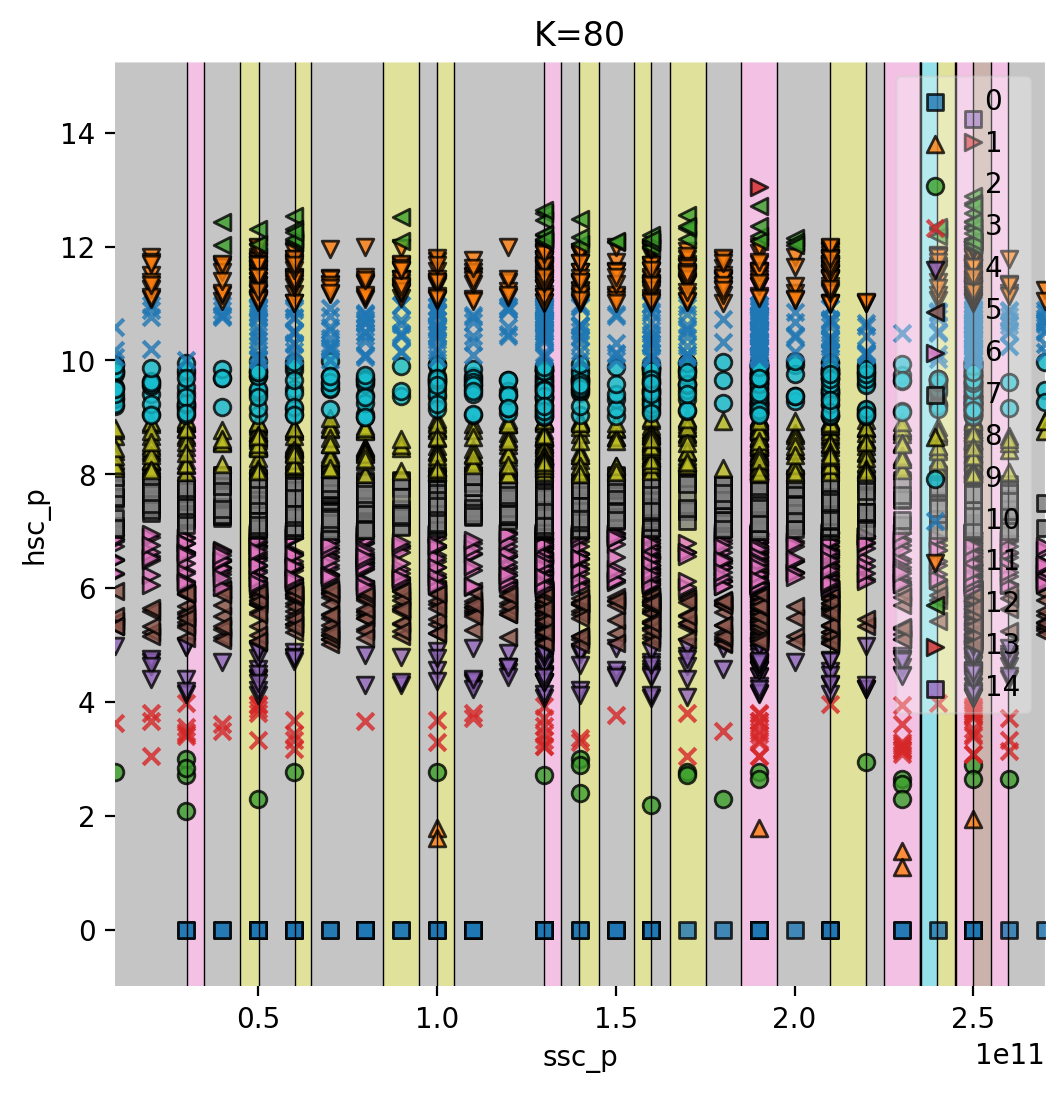

In [92]:
knn_comparison(all_data=dummies, k=80)